# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [6]:
import requests
import json

cotacoes = requests.get('https://economia.awesomeapi.com.br/all')
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.707', 'low': '5.6655', 'varBid': '0.0137', 'pctChange': '0.24', 'bid': '5.6936', 'ask': '5.695', 'timestamp': '1639663811', 'create_date': '2021-12-16 11:10:11'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.87', 'low': '5.81', 'varBid': '-0.04', 'pctChange': '-0.68', 'bid': '5.66', 'ask': '6', 'timestamp': '1639663380', 'create_date': '2021-12-16 11:03:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '4.4703', 'low': '4.4181', 'varBid': '0.0314', 'pctChange': '0.71', 'bid': '4.4568', 'ask': '4.4583', 'timestamp': '1639663811', 'create_date': '2021-12-16 11:10:11'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '7.6283', 'low': '7.5223', 'varBid': '0.0636', 'pctChange': '0.84', 'bid': '7.596', 'ask': '7.5996', 'timestamp': '1639663810', 'creat

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [15]:
print('Dólar: {}'.format(cotacoes_dic['USD']['bid']))
print('Euro: {}'.format(cotacoes_dic['EUR']['bid']))
print('Bitcoin: {}'.format(cotacoes_dic['BTC']['bid']))

Dólar: 5.6936
Euro: 6.4601
Bitcoin: 279.841


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [24]:
cotacoes_dol30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar_dic = cotacoes_dol30d.json()
# print(cotacoes_dolar_dic[0])

lista_cotacoes_dolar = [float(item['bid']) for item in cotacoes_dolar_dic]
print(lista_cotacoes_dolar)

[5.0358, 5.5458, 5.6753, 5.5679, 5.6133, 5.5892, 5.6639, 5.7075, 5.7071, 5.6315, 5.7729, 5.7819, 5.7561, 5.6491, 5.6211, 5.5214, 5.5602, 5.5832, 5.6244, 5.6156, 5.5518, 5.5357, 5.672, 5.8025, 5.8755, 5.6908, 5.6693, 5.6193, 5.6761, 5.6418]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [39]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/BTC-BRL/100?start_date=20211001&end_date=20211031')
cotacoes_btc_dic = cotacoes_btc.json()

lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]
lista_cotacoes_btc.reverse()
print(lista_cotacoes_btc)

[345.92, 345.924, 345.785, 345.797, 345.8, 345.943, 345.944, 345.85, 346.43, 345.893, 346.43, 345.0, 343.704, 343.5, 344.0, 344.0, 343.029, 343.301, 343.301, 343.03, 342.0, 342.0, 342.0, 341.523, 343.4, 343.454, 344.093, 345.2, 344.094, 344.0, 343.5, 343.873, 343.873, 344.172, 343.503, 343.0, 342.0, 342.0, 342.0, 342.0, 342.001, 342.7, 342.75, 342.5, 342.502, 343.241, 341.387, 342.765, 342.765, 344.21, 344.5, 344.0, 343.0, 343.55, 344.3, 345.126, 344.3, 344.3, 343.58, 343.58, 343.361, 343.545, 344.677, 344.152, 344.185, 344.185, 346.0, 345.084, 343.799, 344.536, 345.26, 345.26, 345.134, 345.136, 345.136, 345.137, 345.134, 344.585, 345.583, 346.055, 346.05, 346.21, 346.573, 346.1, 348.749, 348.8, 349.158, 349.143, 349.143, 349.326, 349.4, 349.5, 349.818, 349.818, 349.389, 349.39, 349.495, 349.389, 349.326, 349.25]


#### Gráfico com as cotações do BitCoin

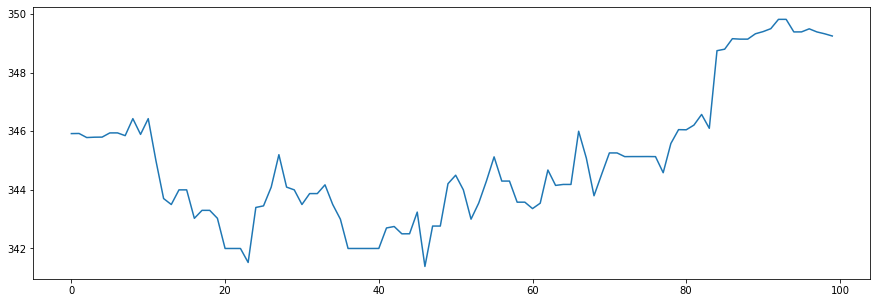

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(lista_cotacoes_btc)
plt.show()